2023-03-07 <br/>
Numbats in Australia <br/>
https://github.com/rfordatascience/tidytuesday/blob/master/data/2023/2023-03-07/readme.md

Detailed Maps - Completed

https://towardsdatascience.com/the-battle-of-interactive-geographic-visualization-part-3-plotly-graph-objects-go-c3d3f2a00132

In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default='jupyterlab'
import os

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-03-07/numbats.csv")
df.head()

,decimalLatitude,decimalLongitude,eventDate,scientificName,taxonConceptID,recordID,dataResourceName,year,month,wday,hour,day,dryandra,prcp,tmax,tmin
0,-37.650000,145.533330,NaN,Myrmecobius fasciatus,https://biodiversity.org.au/afd/taxa/6c72d199-...,73830609-3d94-461f-a833-01c0a30c5a0d,Queen Victoria Museum Art Gallery provider for...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
1,-35.103409,150.256989,2014-06-05T02:00:00Z,Myrmecobius fasciatus,https://biodiversity.org.au/afd/taxa/6c72d199-...,13287c0e-034d-4f05-908b-d3b60c90813d,ALA species sightings and OzAtlas,2014.0,Jun,Thu,2.0,2014-06-05,False,NaN,NaN,NaN
2,-35.000000,117.500000,NaN,Myrmecobius fasciatus,https://biodiversity.org.au/afd/taxa/6c72d199-...,1041c2af-7e1f-4344-b79c-9c04aa3a55b5,Western Australian Museum provider for OZCAM,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
3,-34.700000,117.800000,NaN,Myrmecobius fasciatus,https://biodiversity.org.au/afd/taxa/6c72d199-...,c9804b7a-de92-42db-8912-632dc37baa38,Western Australian Museum provider for OZCAM,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
4,-34.600000,117.300000,NaN,Myrmecobius fasciatus,https://biodiversity.org.au/afd/taxa/6c72d199-...,bc0c873a-6a10-4035-9589-a0270622b293,Western Australian Museum provider for OZCAM,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN


In [4]:
df.columns

Index(['decimalLatitude', 'decimalLongitude', 'eventDate', 'scientificName',
       'taxonConceptID', 'recordID', 'dataResourceName', 'year', 'month',
       'wday', 'hour', 'day', 'dryandra', 'prcp', 'tmax', 'tmin'],
      dtype='object')

In [5]:
df.scientificName.nunique()

2

In [6]:
color_dict = dict(zip(list(df.scientificName.unique()),
                      ['yellow', 'blue']))

In [13]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geocoder") #Do not forget to put in the user_agent argument
location = geolocator.geocode("Australia")
print((location.latitude, location.longitude))

(-24.7761086, 134.755)


In [32]:
fig = go.Figure(data=go.Scattergeo(
        lon = df['decimalLongitude'],
        lat = df['decimalLatitude'],
       # text = df['vicinity'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            color=[color_dict[x] for x in df['scientificName']],
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            )        )))
fig.update_layout(
            height=600,
            margin={"r":0,"t":0,"l":0,"b":0},
            title = "Where are Numbats Found in Australia"
            )


fig.update_geos(
    resolution=50,
    showcoastlines=True, coastlinecolor="RebeccaPurple",
    showland=True, landcolor="#C1E1C1",
    showocean=True, oceancolor="#99cccc",
    showlakes=True, lakecolor="Blue",
    showrivers=True, rivercolor="Blue",
    projection_scale =4,
    center=dict(
            lat=location.latitude,
            lon=location.longitude
        )
)

fig.show()

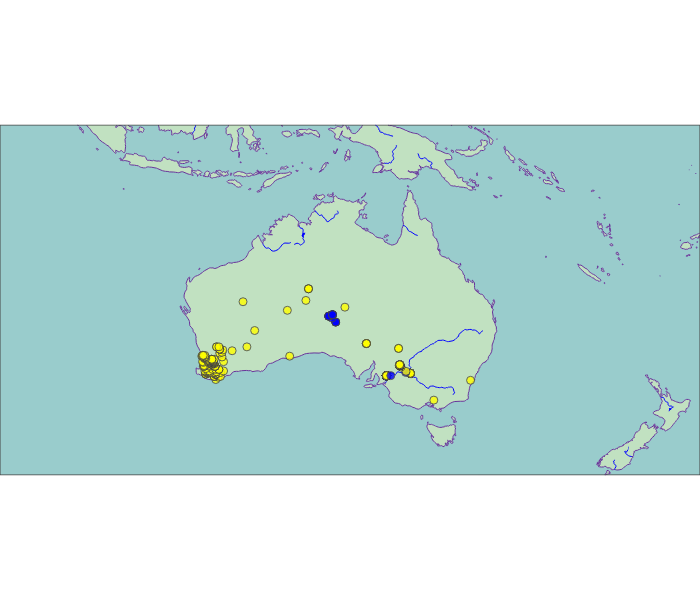

In [33]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)